In [1]:
!python --version

Python 3.10.9


In [2]:
import adelio            as aio
import matplotlib.pyplot as plt
import numpy             as np
import os
import preprocessing     as pre
import processing        as pro

Eyy description :
-----------------
shape : (1328, 211)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.009779571056074209
std   : 0.016349865239292535

Img description :
-----------------
shape : (1328, 1328)
type  : float64
NaN   : False
min   : -0.00422234079063837
max   : 0.14902287963103
mean  : 0.00977957105607421
std   : 0.006517129751071644

Autocorrelation description :
-----------------------------
shape : (1328, 1328)
type  : float64
NaN   : False
min   : 0.6014444910921535
max   : 1.0
mean  : 0.6924765721123184
std   : 0.031466510631978035


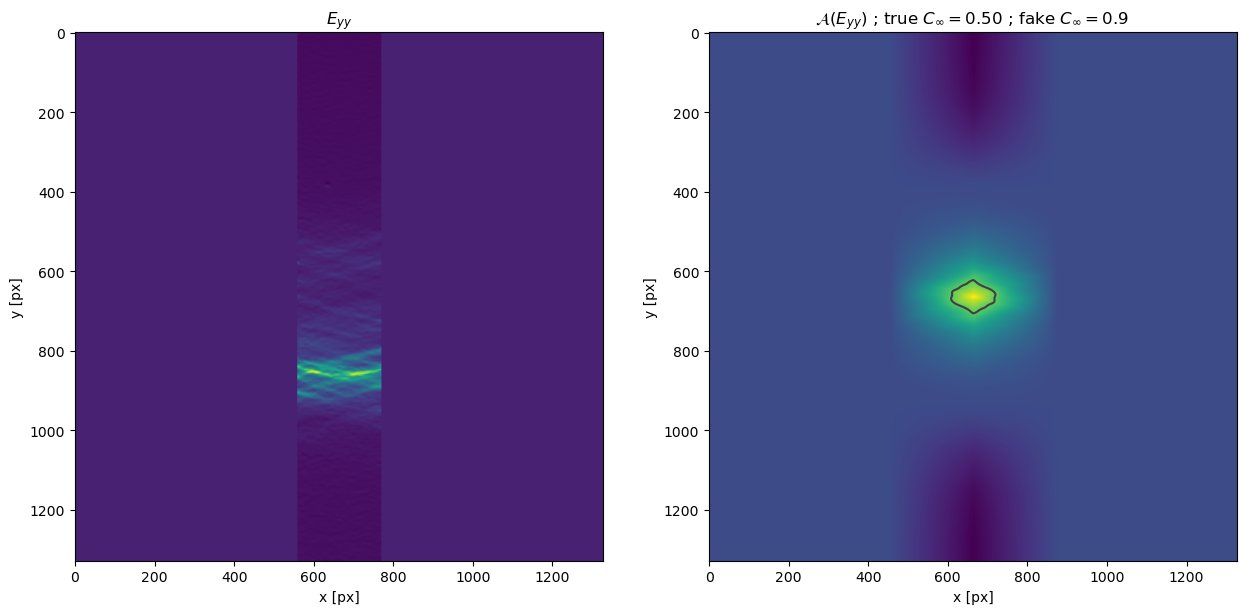

In [3]:
path = os.path.join("C:\\Users", "julie", "Documents", "experiences", "S18_Eyy_point679.csv")
eyy  = np.genfromtxt( path, delimiter=',' )
eyy  = eyy[np.logical_not(np.isnan(eyy).any(axis=1))]

print("Eyy description :")
print("-----------------")
print(f"shape : {eyy.shape}")
print(f"type  : {eyy.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy))}")
print(f"min   : {np.nanmin(eyy)}")
print(f"max   : {np.nanmax(eyy)}")
print(f"mean  : {np.nanmean(eyy)}")
print(f"std   : {np.nanstd(eyy)}")


l = min(eyy.shape)
L = max(eyy.shape)
eyy_img = np.ones((L,L), dtype=np.float64) *np.nanmean(eyy)
eyy_img[:, (L-l)//2:(L+l)//2] = eyy

print()
print("Img description :")
print("-----------------")
print(f"shape : {eyy_img.shape}")
print(f"type  : {eyy_img.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy_img))}")
print(f"min   : {np.nanmin(eyy_img)}")
print(f"max   : {np.nanmax(eyy_img)}")
print(f"mean  : {np.nanmean(eyy_img)}")
print(f"std   : {np.nanstd(eyy_img)}")


eyy_auto = pro.autocorrelation(eyy_img)
eyy_cinf = pro.cinf(eyy_img)

print()
print("Autocorrelation description :")
print("-----------------------------")
print(f"shape : {eyy_auto.shape}")
print(f"type  : {eyy_auto.dtype}")
print(f"NaN   : {np.any(np.isnan(eyy_auto))}")
print(f"min   : {np.nanmin(eyy_auto)}")
print(f"max   : {np.nanmax(eyy_auto)}")
print(f"mean  : {np.nanmean(eyy_auto)}")
print(f"std   : {np.nanstd(eyy_auto)}")

fig = plt.figure(figsize=(15,7))
axe = fig.add_subplot(1, 2, 1)
axe.imshow(eyy_img)
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$E_{yy}$")

axe = fig.add_subplot(1, 2, 2)
axe.imshow(eyy_auto)
axe.contour(eyy_auto, [eyy_cinf, 0.90, 1], cmap="Greys")
axe.set_xlabel("x [px]")
axe.set_ylabel("y [px]")
axe.set_title("$\mathcal{A}(E_{yy})$ ; true $C_\infty =$"+"{:.2f}".format(eyy_cinf)+" ; fake $C_\infty = 0.9$ ")
plt.show()

I2e description :
-----------------
shape : (1024, 1024)
type  : float64
NaN   : False
min   : 0.0
max   : 1.1959014840682374
mean  : 0.4467336229344207
std   : 0.12046251223138195

J2e description :
-----------------
shape : (1024, 1024)
type  : float64
NaN   : False
min   : 0.0
max   : 1.1959014840682374
mean  : 0.4467336229344207
std   : 0.12046251223138195

Autocorrelation description :
-----------------------------
shape : (1024, 1024)
type  : float64
NaN   : False
min   : 0.0
max   : 1.1959014840682374
mean  : 0.4467336229344207
std   : 0.12046251223138195


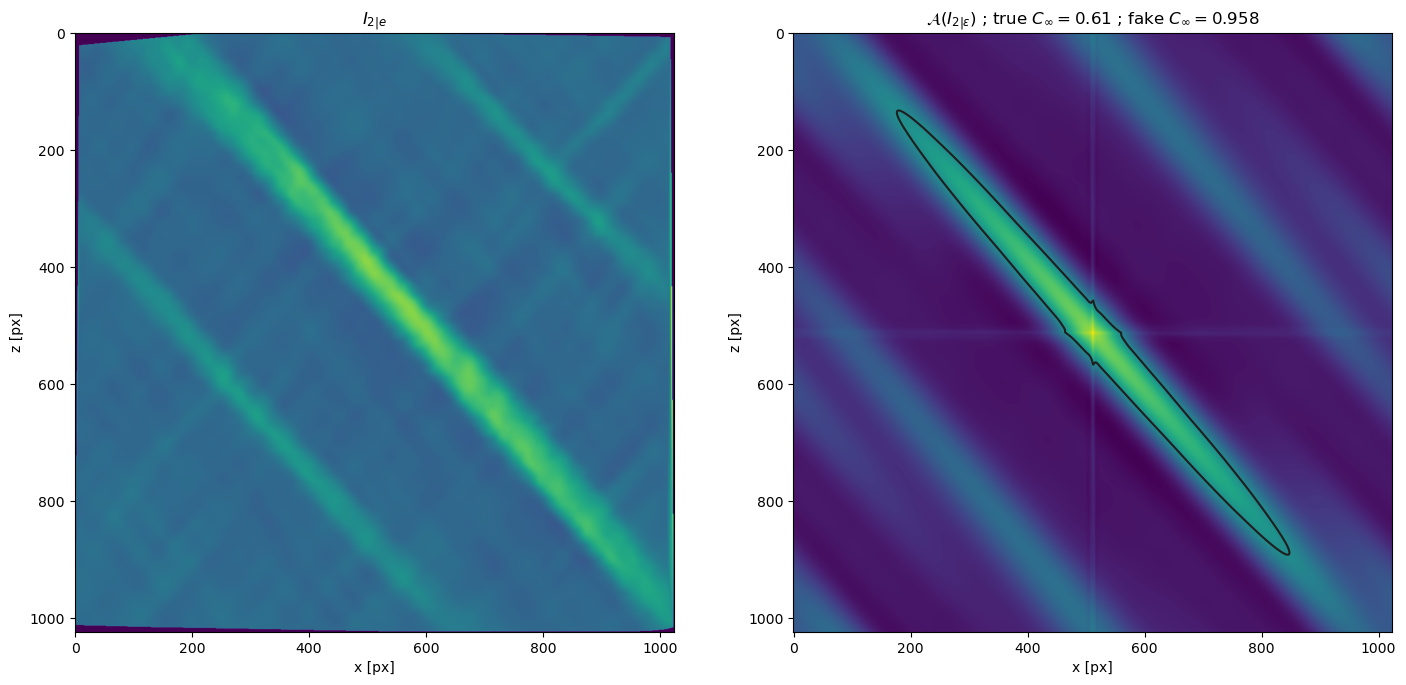

In [4]:
basepath = os.path.join("C:\\Users", "julie", "Documents", "test_deia_Nov2022", "E11_rect_P2_0.5GPa_init0_neigh1_time10_dtup5000_500000_1000K_Zfree_WR7_4e_6_PNew1.5e9_long")
ppath    = os.path.join(basepath, "".join([filename for filename in os.listdir(basepath) if filename.startswith("p")]))
tpath    = os.path.join(basepath, "".join([filename for filename in os.listdir(basepath) if filename.startswith("t")]))


tfile = aio.Tfile(tpath)
pfile = aio.Pfile(ppath)


it = len(tfile.read())-1    # number of snaps in the source, i.e the index of the last one


i2e_img, j2e_img = pre.field2pic(pfile, "e", it)


print("I2e description :")
print("-----------------")
print(f"shape : {i2e_img.shape}")
print(f"type  : {i2e_img.dtype}")
print(f"NaN   : {np.any(np.isnan(i2e_img))}")
print(f"min   : {np.nanmin(i2e_img)}")
print(f"max   : {np.nanmax(i2e_img)}")
print(f"mean  : {np.nanmean(i2e_img)}")
print(f"std   : {np.nanstd(i2e_img)}")
print()
print("J2e description :")
print("-----------------")
print(f"shape : {j2e_img.shape}")
print(f"type  : {j2e_img.dtype}")
print(f"NaN   : {np.any(np.isnan(j2e_img))}")
print(f"min   : {np.nanmin(j2e_img)}")
print(f"max   : {np.nanmax(j2e_img)}")
print(f"mean  : {np.nanmean(j2e_img)}")
print(f"std   : {np.nanstd(j2e_img)}")


i2e_auto = pro.autocorrelation(i2e_img)
i2e_cinf = pro.cinf(i2e_img)

print()
print("Autocorrelation description :")
print("-----------------------------")
print(f"shape : {i2e_img.shape}")
print(f"type  : {i2e_img.dtype}")
print(f"NaN   : {np.any(np.isnan(i2e_img))}")
print(f"min   : {np.nanmin(i2e_img)}")
print(f"max   : {np.nanmax(i2e_img)}")
print(f"mean  : {np.nanmean(i2e_img)}")
print(f"std   : {np.nanstd(i2e_img)}")

fig = plt.figure(figsize=(17,8))

axe = fig.add_subplot(1, 2, 1)
axe.imshow(i2e_img)
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$I_{2|e}$")

axe = fig.add_subplot(1, 2, 2)
axe.imshow(i2e_auto)
axe.contour(i2e_auto, [i2e_cinf, 0.958, 1.], cmap="Greys")
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$\mathcal{A}(I_{2|\\varepsilon})$ ; true $C_\infty=$"+"{:.2f}".format(i2e_cinf)+" ; fake $C_\infty = 0.958$")

plt.show()

# Spatial analysis : length and witdh versus angle

## First try : for each couple $(y_i, x_j)$, find the intersection with $C_\infty$, then compute the norm and the angle.

In [5]:
def detect_contour(auto: np.ndarray, cinf: float) -> tuple:
    
    # Coordinates of the center of the image [px]
    x0 = np.int_(auto.shape[1]/2)
    y0 = np.int_(auto.shape[0]/2)

    # Couples of integers : (idy, idx) if auto[idy, idx] > cinf
    mask = np.argwhere(auto >= cinf)

    # Norm [px], argument [°] of these couple of points
    norm = np.sqrt( np.power(mask[:, 0]-y0, 2) + np.power(mask[:, 1]-x0, 2) )
    angl = np.arctan(mask[:, 1] /mask[:, 0]) *180 /np.pi

    return (norm, angl)

In [6]:
norm, angl = detect_contour(i2e_auto, 0.95)

print("Angle description :")
print("-------------------")
print(f"shape : {angl.shape}")
print(f"type  : {angl.dtype}")
print(f"NaN   : {np.any(np.isnan(angl))}")
print(f"min   : {np.nanmin(angl)}")
print(f"max   : {np.nanmax(angl)}")
print(f"mean  : {np.nanmean(angl)}")
print(f"std   : {np.nanstd(angl)}")

Angle description :
-------------------
shape : (78020,)
type  : float64
NaN   : False
min   : 26.452926507073155
max   : 90.0
mean  : 46.36774200979979
std   : 4.667245867007219


C:\Users\julie\AppData\Local\Temp\ipykernel_16540\4258762392.py:12: RuntimeWarning: divide by zero encountered in divide
  angl = np.arctan(mask[:, 1] /mask[:, 0]) *180 /np.pi


In [7]:
np.unique(angl).shape

(52187,)

## Second try : for each $\theta \in (0, \frac{\pi}{2})$, find the intersection with $C_\infty$, then compute the norm

In [8]:
i2e_cinf = 0.95

t = np.pi /4.

j_ = np.linspace(0, 511, 512).astype(np.int32)
i_ = np.round(j_ *np.power(np.tan(t), 1)).astype(np.int32)

print(f"shape  : {i_.shape}")
print(f"min    : {i_.min()}")
print(f"max    : {i_.max()}")
print(f"Head   : {i_[:10]}")
print(f"Tail   : {i_[-10:]}")

for i, j in zip(i_, j_):
    if i2e_auto[512-i, 512+j] >= i2e_cinf:
        continue
    else:
        norm = np.sqrt( (i)**2 + (j)**2 )
        break

print(i)
print(j)
print(i2e_auto[512-i, j+512])
print(norm)

shape  : (512,)
min    : 0
max    : 511
Head   : [0 1 2 3 4 5 6 7 8 9]
Tail   : [502 503 504 505 506 507 508 509 510 511]
28
28
0.9487233576796165
39.59797974644666


## In the second quadrant now : $\theta \in (\frac{\pi}{2};\pi)$

In [9]:
t = 3 *np.pi /4.
t = np.pi -t

j_ = np.linspace(511, 0, 512).astype(np.int32)
i_ = np.round(j_ *np.tan(t)).astype(np.int32)

for i, j in zip(i_, j_):
    if i2e_auto[512-i, 512-j] >= i2e_cinf:
        continue
    else:
        norm = np.sqrt( (i)**2 + (j)**2 )
        break

print(i)
print(j)
print(i2e_auto[512-i, 512-j])
print(norm)

511
511
0.9414910354964144
722.6631303726516


## Implementation

This function computes the distance between the center of the picture and the level $C_\infty$ in the direction defined by an angle $\theta \in (0, \pi)$.

In [10]:
def length_vs_angle(auto: np.ndarray, cinf: float, angle: float) -> float:
    length = 0.0

    N = auto.shape[0]
    
    if angle < 0:
        raise NotImplementedError
    
    elif angle > np.pi:
        angle = angle - np.pi

    else:
        pass
    
    if angle < np.pi /2.:
        j_ = np.linspace(0, N/2-1, int(N/2)).astype(np.int32)
        i_ = np.round(j_ *np.tan(angle)).astype(np.int32)

        j_ = j_[i_ < N//2]
        i_ = i_[i_ < N//2]

        for i, j in zip(i_, j_):
            if auto[N//2-i, N//2+j] >= cinf:
                continue
            else:
                length = np.sqrt( (i)**2 + (j)**2 )
                break

    else:
        angle = np.pi - angle
        j_ = np.linspace(0, N/2-1, int(N/2)).astype(np.int32)
        i_ = np.round(j_ *np.tan(angle)).astype(np.int32)

        j_ = j_[i_ < N//2]
        i_ = i_[i_ < N//2]

        for i, j in zip(i_, j_):
            if auto[N//2-i, N//2-j] >= cinf:
                continue
            else:
                length = np.sqrt( (i)**2 + (j)**2 )
                break
    
    return length

## Application to the experimental sample

In [11]:
eyy_cinf = 0.90

eyy_angles = np.linspace(0, np.pi, 128)
eyy_length = np.zeros_like(eyy_angles)

for i, angle in enumerate(eyy_angles):
    eyy_length[i] = length_vs_angle(eyy_auto, eyy_cinf, angle)

print(f"shape  : {eyy_length.shape}")
print(f"NaNs   : {np.any(np.isnan(eyy_length))}")
print(f"mean   : {eyy_length.mean()}")
print(f"min    : {eyy_length.min()}")
print(f"argmin : {eyy_length.argmin()}")
print(f"angle  : {eyy_angles[eyy_length.argmin()]*180/np.pi}")
print(f"max    : {eyy_length.max()}")
print(f"argmax : {eyy_length.argmax()}")
print(f"angle  : {eyy_angles[eyy_length.argmax()]*180/np.pi}°")

shape  : (128,)
NaNs   : False
mean   : 44.47587093909449
min    : 34.66987164671943
argmin : 40
angle  : 56.69291338582678
max    : 81.00617260431454
argmax : 63
angle  : 89.29133858267717°


min  : 56.69291338582678 [°] ; 34.66987164671943 [px]
max  : 89.29133858267717 [°] ; 81.00617260431454 [px]
diff : 32.598425196850386


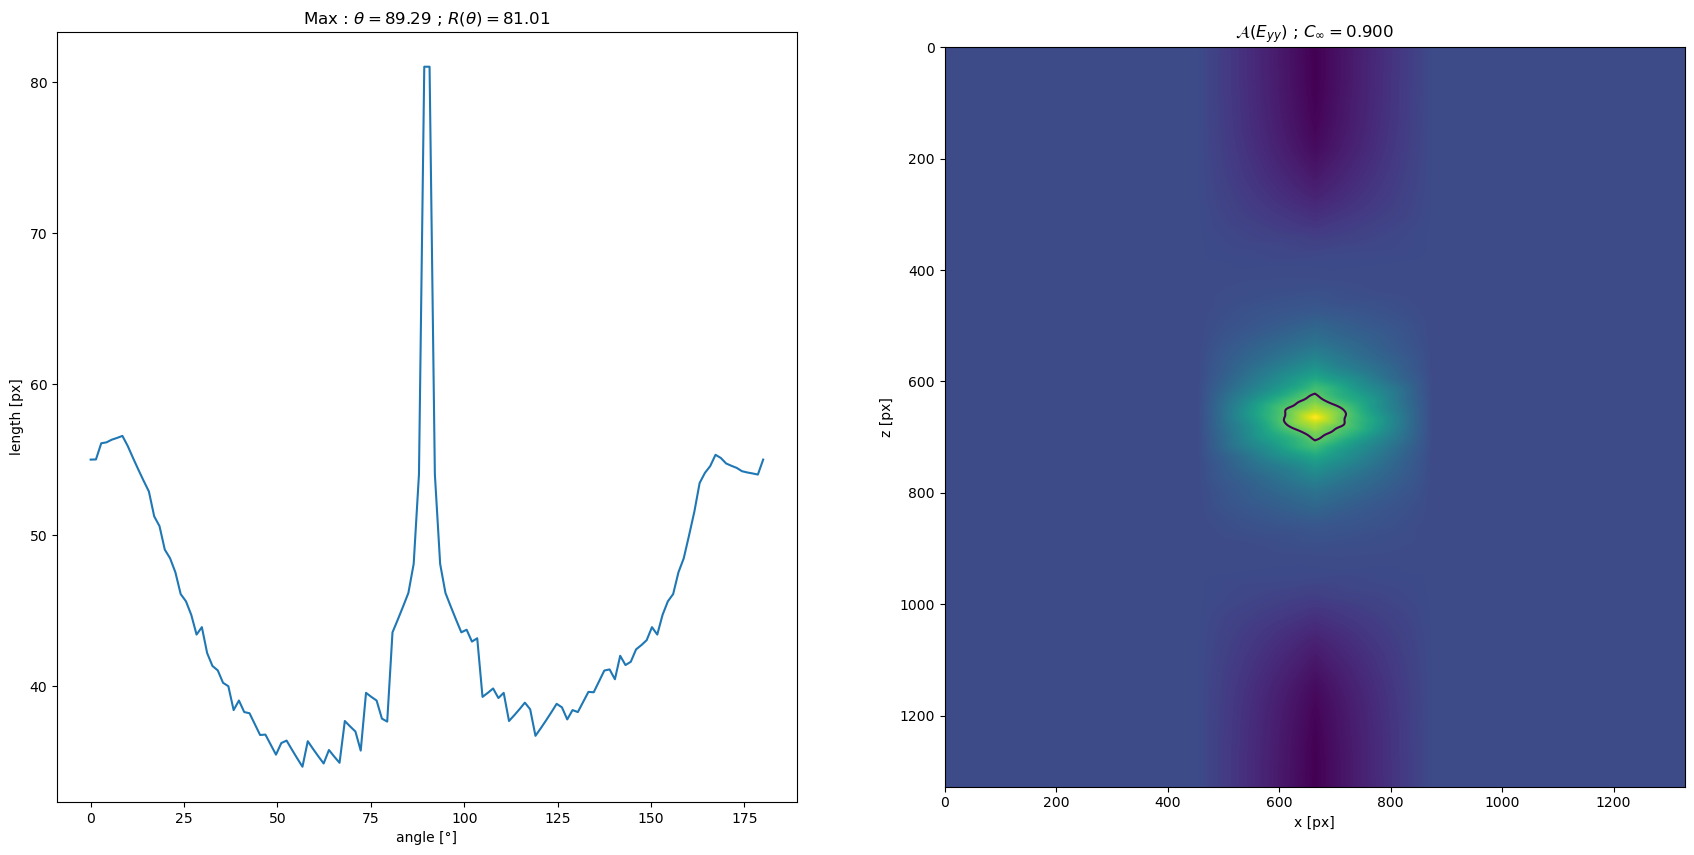

In [12]:
fig = plt.figure(figsize=(21, 10))

axe = fig.add_subplot(1, 2, 1)
axe.plot(eyy_angles*180/np.pi, eyy_length)
axe.set_xlabel("angle [°]")
axe.set_ylabel("length [px]")
axe.set_title("Max : $\\theta=$"+"{:.2f}".format(eyy_angles[eyy_length.argmax()]*180/np.pi)+" ; $R(\\theta) =$"+"{:.2f}".format(eyy_length.max()))

axe = fig.add_subplot(1, 2, 2)
axe.imshow(eyy_auto)
axe.contour(eyy_auto, [eyy_cinf, 1.])
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$\mathcal{A}(E_{yy})$ ; $C_\infty =$"+"{:.3f}".format(eyy_cinf))

print(f"min  : {eyy_angles[eyy_length.argmin()]*180/np.pi} [°] ; {eyy_length.min()} [px]")
print(f"max  : {eyy_angles[eyy_length.argmax()]*180/np.pi} [°] ; {eyy_length.max()} [px]")
print(f"diff : {(eyy_angles[eyy_length.argmax()] - eyy_angles[eyy_length.argmin()])*180/np.pi}")
plt.show()

Let visualize this data on a polar plot.

[]

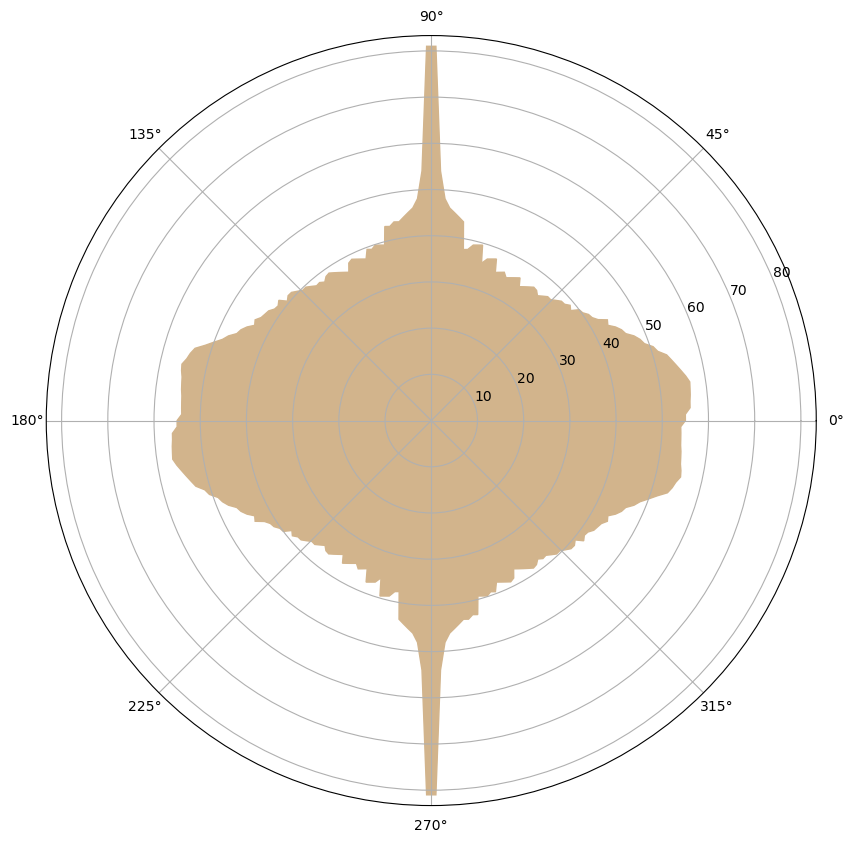

In [13]:
eyy_fangles = np.hstack((eyy_angles, np.pi+eyy_angles))
eyy_flength = np.hstack((eyy_length, eyy_length))


fig = plt.figure(figsize=(10,10))

axe = fig.add_subplot(1, 1, 1, projection="polar")
axe.fill(eyy_fangles, eyy_flength, color="tan")
axe.set_rmax(eyy_length.max())

plt.plot()

## Application to the simulation

In [14]:
i2e_cinf = 0.96

i2e_angles = np.linspace(0, np.pi, 128)
i2e_length = np.zeros_like(i2e_angles)

for i, angle in enumerate(i2e_angles):
    i2e_length[i] = length_vs_angle(i2e_auto, i2e_cinf, angle)

print(f"shape  : {i2e_length.shape}")
print(f"NaNs   : {np.any(np.isnan(i2e_length))}")
print(f"mean   : {i2e_length.mean()}")
print(f"min    : {i2e_length.min()}")
print(f"argmin : {i2e_length.argmin()}")
print(f"angle  : {i2e_angles[i2e_length.argmin()]*180/np.pi}")
print(f"max    : {i2e_length.max()}")
print(f"argmax : {i2e_length.argmax()}")
print(f"angle  : {i2e_angles[i2e_length.argmax()]*180/np.pi}°")

shape  : (128,)
NaNs   : False
mean   : 78.79871888956473
min    : 30.4138126514911
argmin : 31
angle  : 43.93700787401575
max    : 469.5412654921823
argmax : 93
angle  : 131.81102362204726°


min  : 43.93700787401575 [°] ; 30.4138126514911 [px]
max  : 131.81102362204726 [°] ; 469.5412654921823 [px]
diff : 87.8740157480315


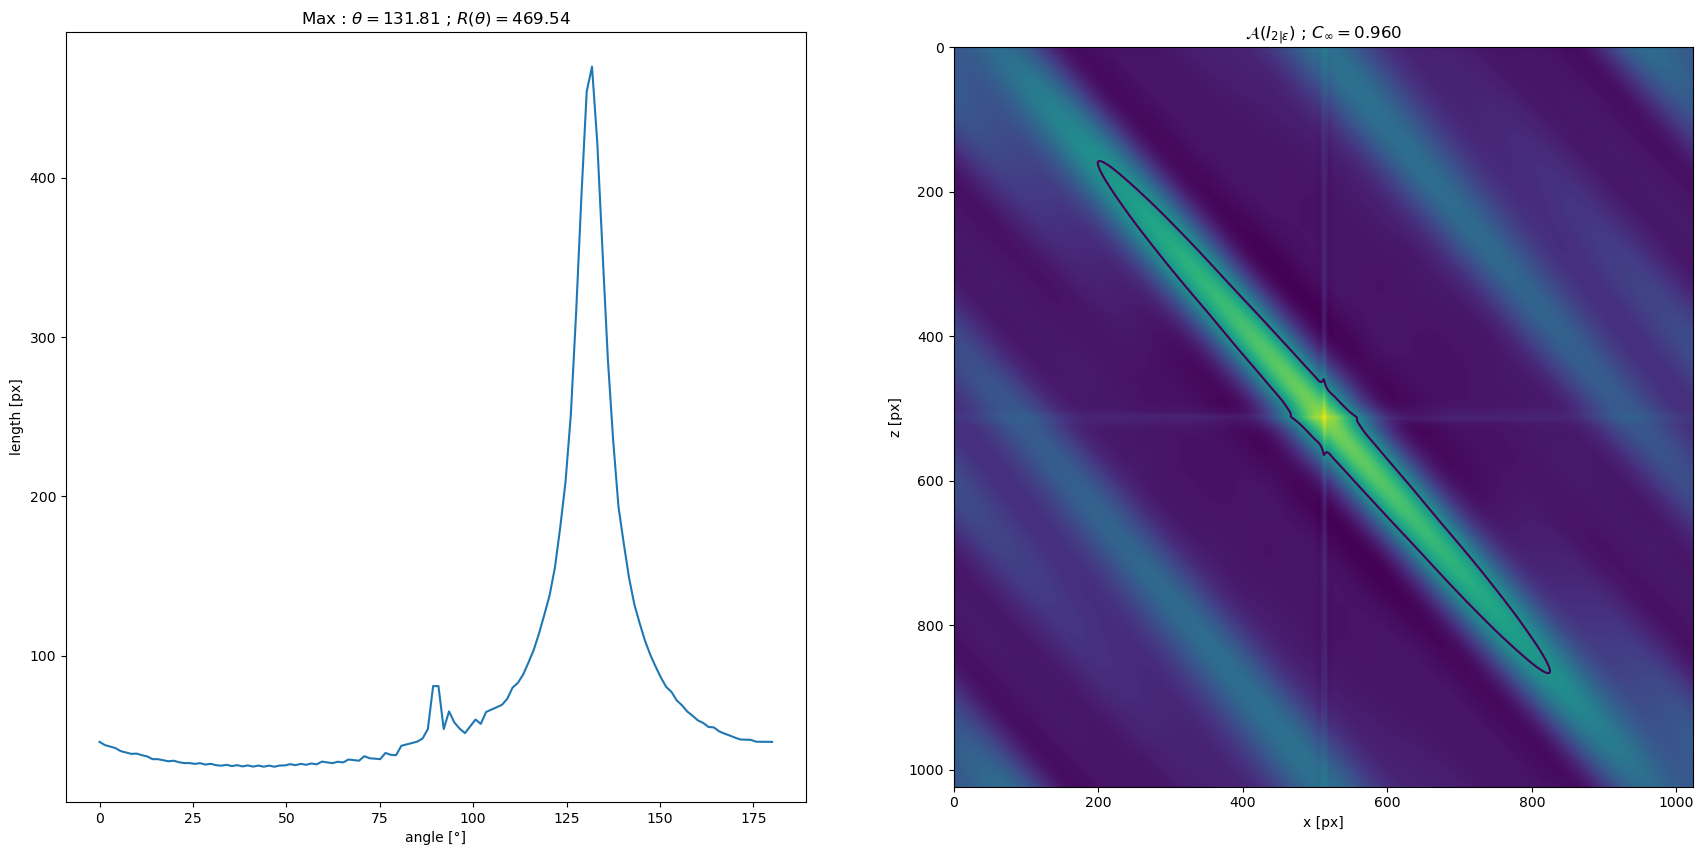

In [15]:
fig = plt.figure(figsize=(21, 10))

axe = fig.add_subplot(1, 2, 1)
axe.plot(i2e_angles*180/np.pi, i2e_length)
axe.set_xlabel("angle [°]")
axe.set_ylabel("length [px]")
axe.set_title("Max : $\\theta=$"+"{:.2f}".format(i2e_angles[i2e_length.argmax()]*180/np.pi)+" ; $R(\\theta) =$"+"{:.2f}".format(i2e_length.max()))

axe = fig.add_subplot(1, 2, 2)
axe.imshow(i2e_auto)
axe.contour(i2e_auto, [i2e_cinf, 1.])
axe.set_xlabel("x [px]")
axe.set_ylabel("z [px]")
axe.set_title("$\mathcal{A}(I_{2|\\varepsilon})$ ; $C_\infty =$"+"{:.3f}".format(i2e_cinf))

print(f"min  : {i2e_angles[i2e_length.argmin()]*180/np.pi} [°] ; {i2e_length.min()} [px]")
print(f"max  : {i2e_angles[i2e_length.argmax()]*180/np.pi} [°] ; {i2e_length.max()} [px]")
print(f"diff : {(i2e_angles[i2e_length.argmax()] - i2e_angles[i2e_length.argmin()])*180/np.pi}")
plt.show()

Let visualize this data on a polar plot. I use the prefix `f` for *full*, e.g for the complete trigonometric circle, obtained by symmetry.

[]

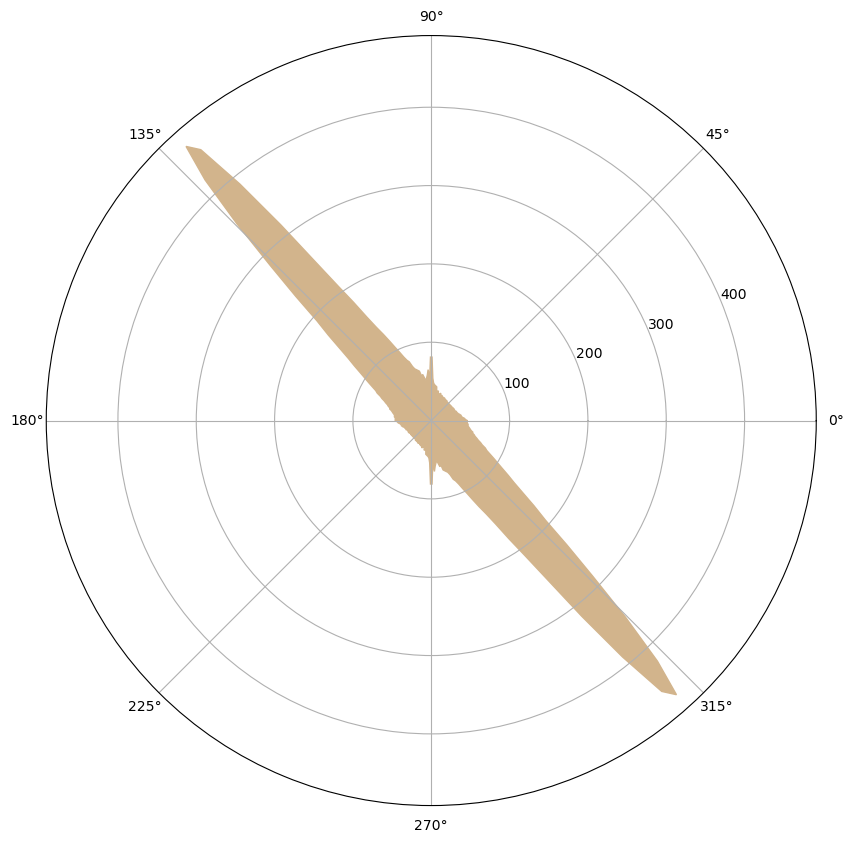

In [16]:
i2e_fangles = np.hstack((i2e_angles, np.pi+i2e_angles))
i2e_flength = np.hstack((i2e_length, i2e_length))


fig = plt.figure(figsize=(10,10))

axe = fig.add_subplot(1, 1, 1, projection="polar")
axe.fill(i2e_fangles, i2e_flength, color="tan")
axe.set_rmax(i2e_length.max())

plt.plot()

## Partial conclusion and bandwidth

At this step, one knows two of the three characteristics of a band characterisation : the direction and the length. Some questions remain : how to properly choose $C_\infty$. Until this notebook, I choose this parameter *by hand*. I miss the last spatial number necessary to completely characterize my band : its width. It should be the direction in the orthogonal angle. I deal with it right now.

The question is : the variable `length` has a max, and I can access the index of this max with the function `argmax()` of any object with the type `np.ndarray`. Then, I can slice `angles` to find that max. Ok. The width is then the length in the direction `angles[length.argmax()] + np.pi/2`. I must find the index of the closest angle of this one but in `angles`. How to do that ? Or maybe should I call for a second time `length_vs_angle()` with this precise angle. It is safe but not that elegant.

### Application to the experimental sample

In [17]:
width = length_vs_angle(eyy_auto, eyy_cinf, eyy_angles[eyy_length.argmax()]+np.pi/2)
width

54.00925846556311

### Application to the simulation

In [18]:
width = length_vs_angle(i2e_auto, i2e_cinf, i2e_angles[i2e_length.argmax()]+np.pi/2)
width

31.144823004794873

# A way to find local maxima of the length

We are interested in the fact to extract the second, third, and so on, maximums. It can not be done directly indeed, because the second most important value is in the same region. One has to remove the entire region around the global maximum, for instance remove the two local minima around this global max.

A local minimum is, at its first order, characterised by a zero of the derivative. Let compute the variations of `length` with `np.diff()`. The sign matters only, so there is no need to divide by the angle.

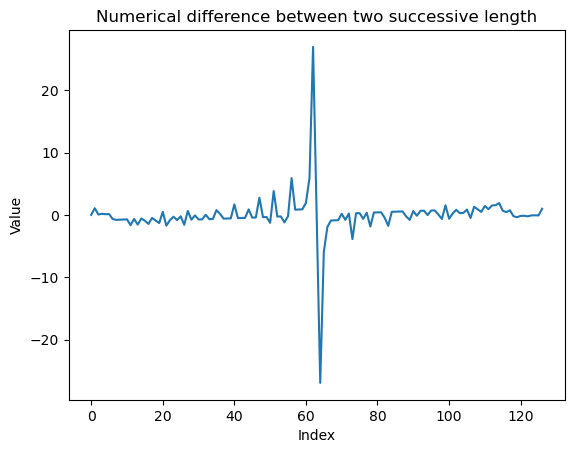

In [21]:
eyy_dl = np.diff(eyy_length)

plt.plot(eyy_dl)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Numerical difference between two successive length")
plt.show()

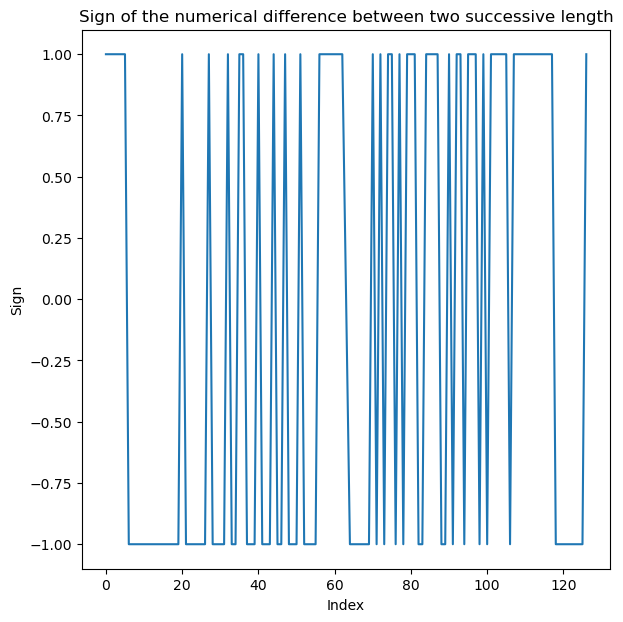

In [27]:
eyy_dlsign = np.sign(eyy_dl)

fig = plt.figure(figsize=(15, 7))

axe = fig.add_subplot(1, 2, 2)
axe.plot(eyy_dlsign)
axe.set_xlabel("Index")
axe.set_ylabel("Sign")
axe.set_title("Sign of the numerical difference between two successive length")

plt.show()

We look for the index where $L'(\theta)=0$. Numerically, there is no reason to fulfill this condition *exactly* so I look for a simple change of sign.

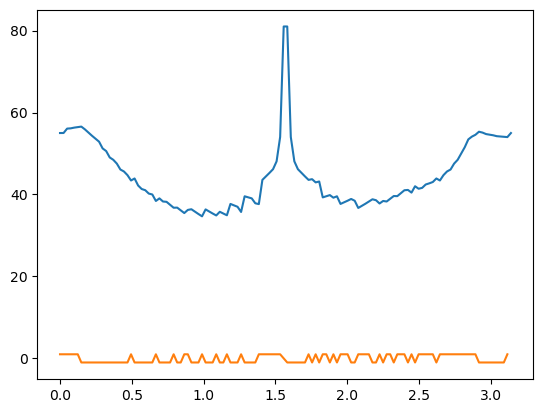

In [32]:
fig = plt.figure()

axe = fig.add_subplot(1, 1, 1)
axe.plot(eyy_angles, eyy_length)
axe.plot(eyy_angles[:-1], eyy_dlsign)

plt.show()

The region that we want to erase of our data is centered in the max, whose index is returned by `argmax()` and then, one look for the first change of sign in each direction (left and right). Then, it is possible to slice vectors `length` and `angles`.

In [33]:
eyy_id0 = eyy_length.argmax()
eyy_dlsign[eyy_id0]

0.0

# Spatial analysis : once again